## Demand Forecasting in Kenya’s Second-Hand Retail Sector

---
### Business Understanding

#### Domain Knowledge – Retail Demand Forecasting

In the highly competitive retail landscape, accurate demand planning plays a critical role in driving profitability, enhancing customer satisfaction, and supporting sustainable growth for businesses. As such, demand forecasting is a fundamental element of a successful retail strategy.

#### Industry Context

Retailers are constantly challenged to manage the balance between two key risks—overstocking and understocking.

- **Overstocking** results in tied-up working capital, elevated storage expenses, and an increased likelihood of product obsolescence.

- **Understocking** can lead to missed sales opportunities, customer dissatisfaction, and a potential decline in market share.



### Challenges in the Retail Domain  

| Challenge            | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| **Seasonality**       | Demand fluctuates during holidays, school reopening, and seasonal changes.  |
| **Promotions & Discounts** | Short-term spikes caused by campaigns (e.g., holiday offers, back-to-school sales). |
| **External Factors**  | Economic trends, competitor actions, and consumer preference shifts add uncertainty. |
| **Data Quality Issues** | POS data may contain duplicates, missing values, or inconsistent product naming. |

### Forecasting Approaches  

| Approach Type        | Methods/Models                                   | Strengths                                                   |
|-----------------------|-------------------------------------------------|-------------------------------------------------------------|
| **Time-Series Models** | ARIMA, Prophet, Exponential Smoothing           | Capture seasonality, trends, and cyclical patterns well.     |
| **Machine Learning**   | Random Forest, XGBoost, LSTMs                   | Handle non-linear patterns, external predictors, and large datasets. |
| **Hybrid Approaches**  | Combination of Time-Series + ML methods         | Leverage strengths of both for improved accuracy.            |




---
The primary objective is to develop a reliable demand forecasting model that predicts future sales volumes for the company’s products. Currently, sales and replenishment decisions are largely reactive, leading to either stockouts (missed revenue opportunities and customer dissatisfaction) or overstocking (increased holding costs, wastage, and tied-up capital).
By leveraging historical sales data and external drivers, the goal is to:

+ Forecast daily/weekly/monthly demand.

+ Identify seasonal peaks and long-term trends.

+ Support data-driven planning for procurement, inventory, and sales strategies

---
### Why Forecasting Demand is Important  

| Area                     | Importance                                                                 |
|---------------------------|----------------------------------------------------------------------------|
| **Operational Efficiency** | Supports workforce planning, supply chain scheduling, and distribution logistics. |
| **Financial Performance** | Enhances budgeting accuracy, cash flow planning, and revenue predictability. |
| **Customer Experience**   | Ensures product availability during peak demand, reducing stockouts.        |
| **Strategic Decision-Making** | Enables data-driven sales target setting, marketing allocation, and supplier negotiations. |

---
### Key Stakeholders and Their Needs  

| Stakeholder                | Needs                                                                 |
|-----------------------------|----------------------------------------------------------------------|
| **Sales & Marketing Team** | Identify peak products/categories to plan promotions and campaigns.   |
| **Procurement & Supply Chain** | Optimize purchase orders, supplier negotiations, and lead-time planning. |
| **Finance & Management**   | Set realistic revenue targets, budgets, and cash flow projections.    |
| **Store/Branch Managers**  | Access localized forecasts (if multi-store) for daily stock control.  |
| **Executive Leadership**   | Understand long-term trends to guide strategic expansion decisions.   |


### Forecasting Granularity & Targets

**Granularity:** The project will assess forecasts at different levels. Product-level, category-level, and aggregated store-level. In order to meet varying stakeholder needs.

**Time Horizon:** Forecasts will be produced for daily, weekly, and monthly intervals.

**Sales Targets:** Forecasts will support both short-term targets (weekly and monthly) and long-term projections (quarterly and yearly).

### Acceptable Accuracy

While perfect forecasts are not realistic, the business aims for models that achieve:

>70–85% accuracy (measured by MAPE/RMSE) at the product level.

>90% accuracy at the aggregated store/category level.

This balance reflects the natural variability in retail demand while ensuring forecasts are reliable enough to support decision-making.



### Business Problem

## Business Problem 

Thrift store chains in Kenya struggle with significant operational inefficiencies and lost profitability due to the reliance on manual, reactive judgment for inventory decisions. This approach fails to account for the market's high volatility, leading to frequent stockouts of high-demand items and excessive accumulation of slow-moving stock. The core business problem is the **absence of a data-driven demand forecasting system** to predict customer demand accurately, resulting in increased holding costs, missed sales opportunities, reduced customer satisfaction, and poor resource allocation across branches.

##  Background and Context

The Kenyan thrift retail industry operates in a uniquely challenging and fast-moving environment characterized by:

*   **Irregular Supply Chains:** Inconsistent and unpredictable donations/purchases of second-hand goods lead to fluctuating and non-uniform product assortments.
*   **Volatile Consumer Demand:** Demand is heavily influenced by price sensitivity, seasonal patterns, fluctuating disposable incomes, and rapidly shifting fashion trends.
*   **Operational Inefficiency:** Despite possessing large volumes of historical sales data, retailers lack the analytical framework to transform this data into actionable insights. Decisions on restocking, procurement, and inter-store transfers are based on experience and guesswork rather than predictive intelligence.

This combination of factors creates a cycle of reactive decision-making. The absence of systematic forecasting directly contributes to:

*   **Frequent stockouts** of fast-moving items, leading to lost sales and dissatisfied customers.
*   **Overstocking** of slow-moving products, increasing holding costs and capital tied up in stagnant inventory.
*   **Suboptimal allocation** of inventory across branches, preventing the strategic placement of products where they are most likely to sell.

##  Project Vision and Value Proposition

This project aims to address this critical gap by developing a robust, data-driven demand forecasting framework. By leveraging historical sales data to build predictive models that capture seasonality, product-level trends, and store-specific variations, this project will provide thrift stores with the tools to:

*   **Accurately anticipate** what customers will buy and in what quantity.
*   **Stock the right products** at the right time and in the right branches.
*   **Transition from reactive** to **proactive and evidence-based** inventory management.

The ultimate value is enhanced inventory planning, reduced waste, improved sales performance, strengthened competitiveness, and increased profitability in Kenya's dynamic thrift retail sector.

##  Research Objectives

To achieve this vision, the project has the following specific objectives:

1.  **To analyze** historical sales data to identify key demand patterns, seasonality, and product performance trends across the thrift store chain.
2.  **To develop and compare** multiple demand forecasting models (including statistical, machine learning, and time-series approaches) for predicting demand at various aggregation levels (product, category, and store).
3.  **To evaluate** the forecasting accuracy of these models using established error metrics (MAE, RMSE, MAPE, sMAPE) and assess their suitability for dealing with both intermittent and fast-moving demand patterns common in thrift retail.
4.  **To design** an integrated demand forecasting framework that directly supports inventory optimization by minimizing stockouts, reducing overstocking, and improving cross-branch allocation.
5.  **To generate** actionable insights and strategic recommendations to inform procurement, pricing, and distribution decisions for thrift store chain managers.

##  key guiding questions.

This project will be guided by the following  questions:

1.  What specific demand patterns, seasonal effects, and product life-cycle trends can be identified from the historical sales data of the thrift store chain?
2.  Which factors (e.g., product category, seasonality, pricing, store location) most significantly influence customer demand in the Kenyan thrift market?
3.  Which forecasting methods (e.g., ARIMA, Exponential Smoothing, Croston, Prophet, Random Forest, XGBoost) provide the most accurate and reliable predictions for thrift store demand, especially given its intermittent nature?
4.  How can the implementation of accurate demand forecasting directly improve inventory planning metrics by reducing incidences of stockouts and overstocking?
5.  What is a recommended practical and scalable forecasting framework to support both strategic and operational decision-making for thrift store chains in Kenya?

---
## Data Understanding & Preparation  

### 1. Data Overview  
The dataset consists of transaction-level sales data with the following key fields:  

- **Date** – Timestamp of sales transactions.  
- **Receipt Number** – Unique identifier for transactions.  
- **Product/Category** – Classification of items sold.  
- **Quantity** – Number of units sold.  
- **Price** – Unit price at the time of sale.  

### 2. Data Quality Assessment  
| Potential Issue             | Action to Address                                              |
|------------------------------|---------------------------------------------------------------|
| **Missing Values**           | Identify and impute (or remove) missing entries.               |
| **Duplicates**               | Drop duplicate transactions using *Receipt Number* and *Date*. |
| **Inconsistent Naming**      | Standardize product/category names for consistency.             |
| **Outliers in Quantity/Price** | Detect unrealistic values (e.g., negative quantities).        |
| **Granularity Variations**   | Aggregate to daily/weekly/monthly levels as needed.             |

### 3. Data Preparation Steps  
| Step                        | Description                                                    |
|------------------------------|----------------------------------------------------------------|
| **Feature Engineering**      | Create *Revenue = Price × Quantity*, moving averages, lag features. |
| **Aggregation**              | Summarize sales by product, category, or store depending on use-case. |
| **Seasonality Features**     | Add variables for day-of-week, month, holidays, school terms.  |
| **Promotions/Discounts**     | Encode promotional periods as binary or categorical features.   |
| **External Data (Optional)** | Incorporate weather, macroeconomic, or competitor data if available. |

### 4. Prepared Dataset Outputs  
- **Daily Sales Dataset** – Useful for operational planning.  
- **Weekly Sales Dataset** – Useful for tactical decision-making.  
- **Monthly Sales Dataset** – Useful for long-term strategic planning.

### DATA UNDERSTANDING
This dataset is a sales transaction record for a thrift company, covering the period 2022-2024. 

Here’s a breakdown of the data structure.
    
### Data Structure
The CSV contains sales transactions with the following columns:

+ Date: Transaction date (e.g., 01/02/2024)

+ Transaction Type: Almost all are "Sales Receipt".

+ No.: Receipt number is the transaction ID e.g. KEBTTVM84156

+ Product/Service: Name of the product sold (e.g., "S/N3, LADIES T-SHIRT S/S")

+ Memo/Description: Additional description (often repeats the product name)

+ Quantity: Quantity sold

+ Sales Price: Price per unit (formatted with commas as thousand separators)

+ Amount: Total amount for the line item (Qty × Sales Price)

+ Balance: Cumulative balance (running total of sales)

+ Year: 2022 - 2024 for all entries.

+ SourceFile: Indicates the source CSV file i.e. Thrift Company_Sales_All.csv 

### Data Description
+ Customer: All sales are under different stores.

+ Products: Wide variety of second-hand or thrift items:

    1.Clothing (e.g., jackets, pants, shirts, dresses)

    2.Accessories (e.g., wool caps, scarves, boots)

    3.Home textiles (e.g., curtains, bedsheets, towels)

    4.Bulk items (e.g., "Wholesale Bales", "Nylon Rummage")

+ Pricing: Prices are in Kenyan Shillings.

+ Volume: Many transactions involve large quantities (e.g. 90 units of "Hooded Polo" sold at once).

+ Cumulative Balance: The Balance column shows a running total by the end of the sample.

We will use this data to:

+ Analyze sales trends by product category, month, or season.

+ Identify top-selling products or product categories.

+ Calculate total revenue per product, customer, or time period.

+ Track inventory movement based on quantity sold.


### Risks and Limitations
+ Some product names are inconsistent (e.g., mixed case, typos, abbreviations).

+ The Sales Price and Amount columns are stored as text with commas, we will convert them to numbers for analysis.

+ The Balance column appears to be a running total—useful for reconciliation but not for aggregate analysis.


## 🧹 Data Cleaning & Feature Engineering

This notebook outlines a structured pipeline for cleaning, transforming, and enriching raw transaction data from the Thrift Company sales dataset. The goal is to convert unstructured CSV files into a clean, analysis-ready format by applying a series of logical steps:
This section focuses on data preparation workflow by applying structured cleaning and enrichment steps to the raw transactional data. The goal is to ensure data consistency, enhance analytical value, and prepare the dataset for reliable insights and modeling. Key operations include:

- Load and validate raw transactional data
- Standardize column names, data types, and formats
- Extract meaningful date-based features
- Categorize products and identify wholesale or retail patterns
- Engineer financial features such as unit price and transaction tiers
- Detect outliers and flag anomalies for quality control
- Normalize numerical values for downstream analysis or modeling
- Perform comprehensive data quality checks and generate summary insights



In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime 

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#Warnings
import warnings
warnings.filterwarnings('ignore')


print("Libraries imported successfully!")


Libraries imported successfully!


In [10]:
#Loading the dataset
data = pd.read_csv('data/Thrift_Company_sales_All.csv')

#Displaying the first few rows of the dataset
data.head(10)



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Year,SourceFile
0,Sales by Customer Detail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,January - December 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Date,Transaction Type,No.,Product/Service,Memo/Description,Qty,Sales Price,Amount,Balance,Year,SourceFile
4,WS Whole sale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,901 - Gikomba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,01/02/2024,Sales Receipt,KEBTTVM84156,"S/N3, LADIES T-SHIRT S/S","S/N3, LADIES T-SHIRT S/S",2,"6,896.55","13,793.10","13,793.10",2024,Thrift Company_Sales_2024.csv
7,NaN,01/02/2024,Sales Receipt,KEBTTVM84156,Jogging pants,Jogging pants,5,"6,896.55","34,482.76","48,275.86",2024,Thrift Company_Sales_2024.csv
8,NaN,01/02/2024,Sales Receipt,KEBTTVM84156,"S/NE, LADIES MIXED BLOUSES","S/NE, LADIES MIXED BLOUSES",6,"5,603.45","33,620.69","81,896.55",2024,Thrift Company_Sales_2024.csv
9,NaN,01/03/2024,Sales Receipt,KEBTTVM84154,Wholesale:NYLON RUMMAGE,NaN,4,"12,068.97","48,275.86","130,172.41",2024,Thrift Company_Sales_2024.csv


### You will note that the first rows have the following issues;

#### Issue 1: Metadata Headers (Lines 0-3)
- Line 0: Contains only "Year,SourceFile" - not the real column headers
- Line 1: "Sales by Customer Detail" - this is a report title, not data
- Line 2: "January - December 2024" - date range description, not data
- Line 3: Completely empty row
- Line 4: The actual column headers we need

#### Issue 2: Missing First Column Header
- The real headers start with an empty column name ("")
- This creates alignment problems when parsing

#### Issue 3: Inconsistent Data Structure
- First few rows are report formatting, not tabular data
- Real transaction data starts much later



In [18]:
# Skipping the metadata cells
df = pd.read_csv('data/Thrift_Company_sales_All.csv', skiprows=4)

#Missinng first column header
columns = list(df.columns)
columns[0] = 'customer_segment'  
df.columns = columns

# Forward fill customer segments so transactions inherit them
df['customer_segment'] = df['customer_segment'].fillna(method='ffill')


# Inconsistent data structure
df = df[df['Date'].str.match(r'^\d{2}/\d{2}/\d{4}$', na=False)]
print(len(df))

df.tail(10)

132649


,customer_segment,Date,Transaction Type,No.,Product/Service,Memo/Description,Qty,Sales Price,Amount,Balance,Year,SourceFile
132674,99 Warehouse,29/12/2023,Sales Receipt,KEBTTVM84226,"W/N3, CHILDREN HEAVY RUMMAGE","W/N3, CHILDREN HEAVY RUMMAGE",10,"5,603.45","56,034.48","290,597,459.70",2023.0,Thrift_Company_Sales 2023.csv
132675,99 Warehouse,29/12/2023,Sales Receipt,KEBTTVM84226,"S/NE, CHILDREN RUMMAGE","S/NE, CHILDREN RUMMAGE",4,"9,482.76","37,931.03","290,635,390.73",2023.0,Thrift_Company_Sales 2023.csv
132676,99 Warehouse,29/12/2023,Sales Receipt,KEBTTVM84226,Wholesale:Big Soft Textiles,BIG SOFT TEXTILES,1,"15,086.21","15,086.21","290,650,476.94",2023.0,Thrift_Company_Sales 2023.csv
132677,99 Warehouse,29/12/2023,Sales Receipt,KEBTTVM84226,"S/N3, BROKEN FASHION JEANS","S/N3, BROKEN FASHION JEANS",1,"8,620.69","8,620.69","290,659,097.63",2023.0,Thrift_Company_Sales 2023.csv
132678,99 Warehouse,29/12/2023,Sales Receipt,KEBTTVM84226,"S/N3, LADIES T-SHIRT S/S","S/N3, LADIES T-SHIRT S/S",2,"6,465.52","12,931.03","290,672,028.66",2023.0,Thrift_Company_Sales 2023.csv
132679,99 Warehouse,29/12/2023,Sales Receipt,KEBTTVM84226,"S/NE, Ladies Mixed Pants","S/NE, LADIES MIXED PANTS",2,"8,620.69","17,241.38","290,689,270.04",2023.0,Thrift_Company_Sales 2023.csv
132680,99 Warehouse,29/12/2023,Sales Receipt,KEBTTVM84226,"S/N3, CHILDREN COTTON RUMMAGE, 0-6","S/N3, CHILDREN COTTON RUMMAGE, 0-6",1,"15,775.86","15,775.86","290,705,045.90",2023.0,Thrift_Company_Sales 2023.csv
132681,99 Warehouse,29/12/2023,Sales Receipt,KEBTTVM84215,"W/N3, HOODED ADULT SWEATSHIRT","W/N3, HOODED ADULT SWEATSHIRT",2,"6,896.55","13,793.10","290,718,839.00",2023.0,Thrift_Company_Sales 2023.csv
132682,99 Warehouse,29/12/2023,Sales Receipt,KEBTTVM84215,"S/NE, MENS T-SHIRT S/S","S/NE, MENS T-SHIRT S/S",1,"9,418.10","9,418.10","290,728,257.10",2023.0,Thrift_Company_Sales 2023.csv
132683,99 Warehouse,29/12/2023,Sales Receipt,KEBTTVM84215,"Wholesale:S/NE, MENS SPORT","S/NE, MENS SPORT",1,"8,620.69","8,620.69","290,736,877.79",2023.0,Thrift_Company_Sales 2023.csv


##### We have successfully dealt with the issues in our data. We will continue to do further cleaning to our data in preparation to modeling in the following code cells.

In [23]:
#Date formatting
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.quarter
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.values
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)
df.head(10)


,customer_segment,Date,Transaction Type,No.,Product/Service,Memo/Description,Qty,Sales Price,Amount,Balance,Year,SourceFile,Month,Day,DayOfWeek,Quarter,WeekOfYear,IsWeekend
2,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,"S/N3, LADIES T-SHIRT S/S","S/N3, LADIES T-SHIRT S/S",2.0,"6,896.55","13,793.10","13,793.10",2024,Thrift Company_Sales_2024.csv,2,1,Thursday,1,5,0
3,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,Jogging pants,Jogging pants,5.0,"6,896.55","34,482.76","48,275.86",2024,Thrift Company_Sales_2024.csv,2,1,Thursday,1,5,0
4,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,"S/NE, LADIES MIXED BLOUSES","S/NE, LADIES MIXED BLOUSES",6.0,"5,603.45","33,620.69","81,896.55",2024,Thrift Company_Sales_2024.csv,2,1,Thursday,1,5,0
5,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,Wholesale:NYLON RUMMAGE,NaN,4.0,"12,068.97","48,275.86","130,172.41",2024,Thrift Company_Sales_2024.csv,3,1,Friday,1,9,0
6,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/N3, BROKEN FASHION JEANS","S/N3, BROKEN FASHION JEANS",2.0,"9,051.73","18,103.45","148,275.86",2024,Thrift Company_Sales_2024.csv,3,1,Friday,1,9,0
7,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/NE, MENS COTTON PANTS","S/NE, MENS COTTON PANTS",2.0,"9,051.73","18,103.45","166,379.31",2024,Thrift Company_Sales_2024.csv,3,1,Friday,1,9,0
8,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/N3, BROKEN FASHION JEANS","S/N3, BROKEN FASHION JEANS",1.0,"9,051.72","9,051.72","175,431.03",2024,Thrift Company_Sales_2024.csv,3,1,Friday,1,9,0
9,901 - Gikomba,2024-04-01,Sales Receipt,KEBTTVM84153,Men Polo L/S,"W/N3, MW POLO L/S",1.0,"6,034.48","6,034.48","181,465.51",2024,Thrift Company_Sales_2024.csv,4,1,Monday,2,14,0
10,901 - Gikomba,2024-04-01,Sales Receipt,KEBTTVM84153,"SHOES, GUM BOOTS","SHOES, GUM BOOTS",1.0,"5,172.41","5,172.41","186,637.92",2024,Thrift Company_Sales_2024.csv,4,1,Monday,2,14,0
11,901 - Gikomba,2024-04-01,Sales Receipt,KEBTTVM84153,"S/N3, FITTED BED SHEETS, FLANNEL","S/N3, FITTED BED SHEETS, FLANNEL",2.0,"8,620.69","17,241.38","203,879.30",2024,Thrift Company_Sales_2024.csv,4,1,Monday,2,14,0


##### From our code above, we have created  8 new date-based columns from your original Date column and transformed the original datetime column to the right format. The 8 extracted columns include:

- Year - Year (2024)
- Month - Month number (1-12)
- Day - Day of month (1-31)
- DayOfWeek - Day name ("Monday", "Tuesday", etc.)
- Quarter - Quarter number (1-4)
- WeekOfYear - Week number in year (1-52)
- IsWeekend - Weekend flag (0 or 1)

In [26]:
# Checking for duplicates in the dataset
df.duplicated().sum()

0

In [27]:
# Checking for missing values
df.isnull().sum()

customer_segment       0
Date                   0
Transaction Type       0
No.                    0
Product/Service        2
Memo/Description    9201
Qty                    3
Sales Price            2
Amount                 2
Balance                0
Year                   0
SourceFile             0
Month                  0
Day                    0
DayOfWeek              0
Quarter                0
WeekOfYear             0
IsWeekend              0
dtype: int64

In [32]:
#Dealing with missing values

#Dropping the rows with less than 3 non-null values
df = df.dropna(subset=['Qty','Sales Price','Product/Service', 'Amount'])

#Filling the memo/description column with 'No description' for missing values
df['Memo/Description'] = df['Memo/Description'].fillna('No description')

print("Missing values handled successfully!")

#Rechecking for missing values
df.isnull().sum()

Missing values handled successfully!


customer_segment    0
Date                0
Transaction Type    0
No.                 0
Product/Service     0
Memo/Description    0
Qty                 0
Sales Price         0
Amount              0
Balance             0
Year                0
SourceFile          0
Month               0
Day                 0
DayOfWeek           0
Quarter             0
WeekOfYear          0
IsWeekend           0
dtype: int64

In [37]:
# Remove commas and convert to numeric
df['Amount'] = df['Amount'].astype(str).str.replace(',', '').astype(float)
df['Balance'] = df['Balance'].astype(str).str.replace(',', '').astype(float)
df['Sales Price'] = df['Sales Price'].astype(str).str.replace(',', '').astype(float)
df['Qty'] = df['Qty'].astype(float)
# Check our dataset info to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132646 entries, 2 to 132683
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_segment  132646 non-null  object        
 1   Date              132646 non-null  datetime64[ns]
 2   Transaction Type  132646 non-null  object        
 3   No.               132646 non-null  object        
 4   Product/Service   132646 non-null  object        
 5   Memo/Description  132646 non-null  object        
 6   Qty               132646 non-null  float64       
 7   Sales Price       132646 non-null  float64       
 8   Amount            132646 non-null  float64       
 9   Balance           132646 non-null  float64       
 10  Year              132646 non-null  int32         
 11  SourceFile        132646 non-null  object        
 12  Month             132646 non-null  int32         
 13  Day               132646 non-null  int32         
 14  DayOfWeek

In [39]:
# Convert the day of week to numeric for modeling
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping)

print("Day of week converted to numeric successfully!")

df.head(10)

Day of week converted to numeric successfully!


,customer_segment,Date,Transaction Type,No.,Product/Service,Memo/Description,Qty,Sales Price,Amount,Balance,Year,SourceFile,Month,Day,DayOfWeek,Quarter,WeekOfYear,IsWeekend
2,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,"S/N3, LADIES T-SHIRT S/S","S/N3, LADIES T-SHIRT S/S",2.0,6896.55,13793.10,13793.10,2024,Thrift Company_Sales_2024.csv,2,1,NaN,1,5,0
3,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,Jogging pants,Jogging pants,5.0,6896.55,34482.76,48275.86,2024,Thrift Company_Sales_2024.csv,2,1,NaN,1,5,0
4,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,"S/NE, LADIES MIXED BLOUSES","S/NE, LADIES MIXED BLOUSES",6.0,5603.45,33620.69,81896.55,2024,Thrift Company_Sales_2024.csv,2,1,NaN,1,5,0
5,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,Wholesale:NYLON RUMMAGE,No description,4.0,12068.97,48275.86,130172.41,2024,Thrift Company_Sales_2024.csv,3,1,NaN,1,9,0
6,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/N3, BROKEN FASHION JEANS","S/N3, BROKEN FASHION JEANS",2.0,9051.73,18103.45,148275.86,2024,Thrift Company_Sales_2024.csv,3,1,NaN,1,9,0
7,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/NE, MENS COTTON PANTS","S/NE, MENS COTTON PANTS",2.0,9051.73,18103.45,166379.31,2024,Thrift Company_Sales_2024.csv,3,1,NaN,1,9,0
8,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/N3, BROKEN FASHION JEANS","S/N3, BROKEN FASHION JEANS",1.0,9051.72,9051.72,175431.03,2024,Thrift Company_Sales_2024.csv,3,1,NaN,1,9,0
9,901 - Gikomba,2024-04-01,Sales Receipt,KEBTTVM84153,Men Polo L/S,"W/N3, MW POLO L/S",1.0,6034.48,6034.48,181465.51,2024,Thrift Company_Sales_2024.csv,4,1,NaN,2,14,0
10,901 - Gikomba,2024-04-01,Sales Receipt,KEBTTVM84153,"SHOES, GUM BOOTS","SHOES, GUM BOOTS",1.0,5172.41,5172.41,186637.92,2024,Thrift Company_Sales_2024.csv,4,1,NaN,2,14,0
11,901 - Gikomba,2024-04-01,Sales Receipt,KEBTTVM84153,"S/N3, FITTED BED SHEETS, FLANNEL","S/N3, FITTED BED SHEETS, FLANNEL",2.0,8620.69,17241.38,203879.30,2024,Thrift Company_Sales_2024.csv,4,1,NaN,2,14,0


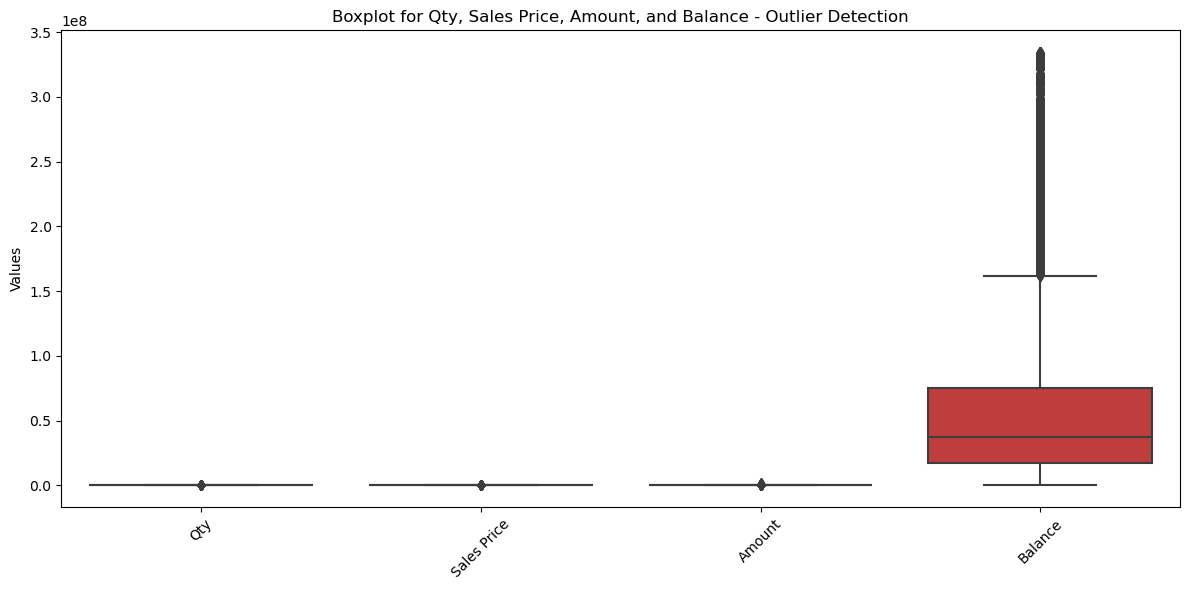

In [41]:
#Checking for outliers in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Qty', 'Sales Price', 'Amount', 'Balance']])
plt.title('Boxplot for Qty, Sales Price, Amount, and Balance - Outlier Detection')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.tight_layout()
plt.show()


From the boxplot,we can infer that:
- Balance column has extreme outliers - values reaching 350+ million
- Qty, Sales Price, and Amount are relatively well-behaved with few outliers
- Scale differences - Balance operates on a much larger scale than other columns
- Most transactions are small - the majority of business involves modest amounts

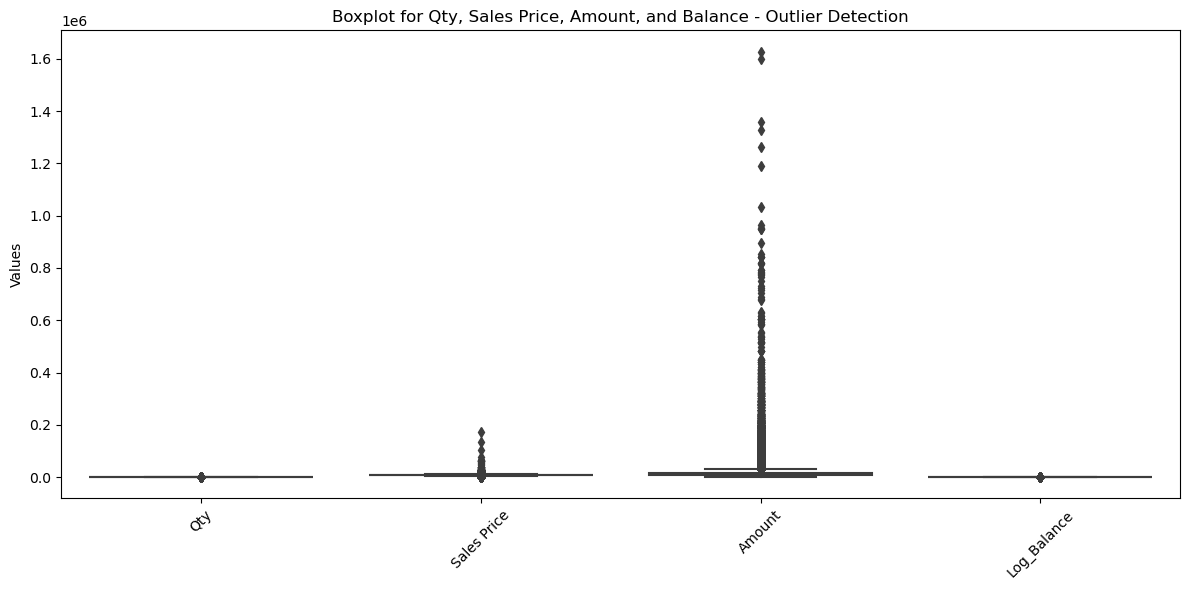

In [43]:
#Lets work on the balance column outliers
#For modeling purposes, we are going to do log transformation on the balance column to reduce the impact of extreme outliers

#Log transformation
df['Log_Balance'] = np.log1p(df['Balance'])

# Rechecking the distribution after log transformation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Qty', 'Sales Price', 'Amount', 'Log_Balance']])
plt.title('Boxplot for Qty, Sales Price, Amount, and Balance - Outlier Detection')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.tight_layout()
plt.show()


In [46]:
# Check the ranges of Amount and Sales Price,to see if log transformation is needed
amount_range = df['Amount'].max() / df['Amount'].min()
price_range = df['Sales Price'].max() / df['Sales Price'].min()

if amount_range < 1000 and price_range < 1000:
    print("✅ You can skip log transformation")
    print("✅ Use tree-based models (Random Forest, XGBoost)")
    print("✅ Focus on feature engineering instead")
else:
    print("⚠️ Consider log transformation")
    print("⚠️ Especially if using linear models")

⚠️ Consider log transformation
⚠️ Especially if using linear models


In [50]:
# Apply log transformations on Amount and Sales Price
df['Amount_log'] = np.log1p(df['Amount'])
df['Sales_Price_log'] = np.log1p(df['Sales Price'])

print("✅ Applied log transformations to Amount and Sales Price")

✅ Applied log transformations to Amount and Sales Price


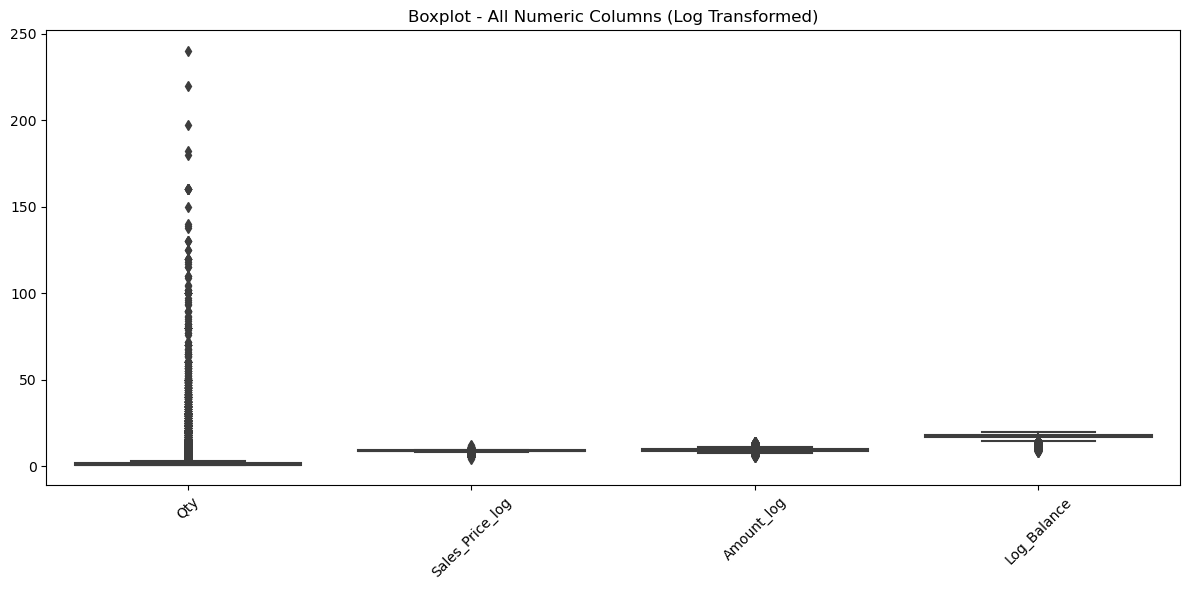

In [51]:
# Updated boxplot with all log-transformed columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Qty', 'Sales_Price_log', 'Amount_log', 'Log_Balance']])
plt.title('Boxplot - All Numeric Columns (Log Transformed)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()